# Chapter 9: Support Vector Machines


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_curve, auc
from sklearn.cross_validation import KFold, train_test_split
from sklearn.preprocessing import label_binarize

#pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
#plt.style.use('seaborn-white')

### 9.6.1 Support vector classifier

In [2]:
def plot_svc(clf, X, y, h=0.02, pad=0.25):
    
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    
    # Indicate support vectors by vertical lines
    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths=2)

    x_min, x_max = np.min(X[:,0]) - pad, np.max(X[:,0]) + pad
    y_min, y_max = np.min(X[:,1]) - pad, np.max(X[:,1]) + pad
                    
    # Color the two subspaces
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    print('Number of support vectors:', clf.support_.size)

/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


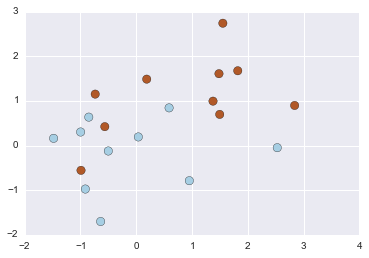

In [3]:
X = np.random.randn(20, 2)
y = np.concatenate((-np.ones(10), np.ones(10)), axis=0)
X[y==1] = X[y==1] + 1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=70);

Number of support vectors: 13


/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


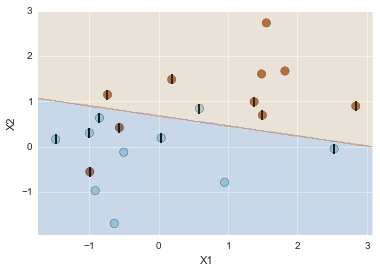

In [4]:
# Support vector classifier with linear kernel
svc = SVC(C=1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

Number of support vectors: 16


/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


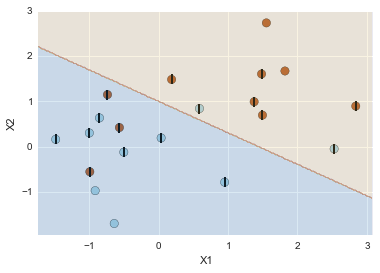

In [5]:
# Using smaller cost parameter C=0.1 we get larger margins, resulting in more support vectors
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)

plot_svc(svc2, X, y)

In [6]:
# Select optimal cost parameter C by cross-validation
tuning_params = {'C': (0.001 , 0.01, 0.1, 1,5,10,100)}
clf = GridSearchCV(SVC(kernel='linear'), param_grid=tuning_params, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.grid_scores_

[mean: 0.75000, std: 0.33541, params: {'C': 0.001},
 mean: 0.75000, std: 0.33541, params: {'C': 0.01},
 mean: 0.75000, std: 0.33541, params: {'C': 0.1},
 mean: 0.80000, std: 0.33166, params: {'C': 1},
 mean: 0.80000, std: 0.33166, params: {'C': 5},
 mean: 0.80000, std: 0.33166, params: {'C': 10},
 mean: 0.80000, std: 0.33166, params: {'C': 100}]

In [7]:
clf.best_params_
# C=1 is best according to GridSearchCV. 

{'C': 1}

### 9.6.2 Support Vector Machine

/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


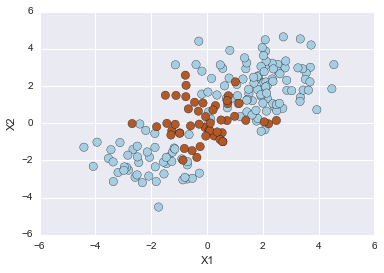

In [8]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [9]:
# Radial Basis Function (RBF) kernel 
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors: 51


/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


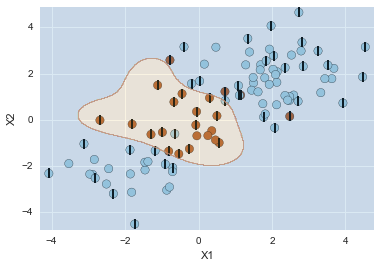

In [10]:
plot_svc(svm, X_train, y_train)

In [11]:
# Increase C to allow for more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1)
svm2.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors: 36


/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


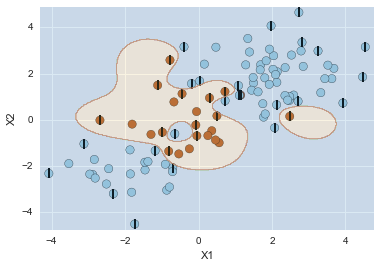

In [12]:
plot_svc(svm2, X_train, y_train)

In [13]:
# Select optimal parameters by cross-validation
tuning_params = [{'C': [0.01, 0.1, 1, 10,100],
                'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), param_grid=tuning_params, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.grid_scores_

[mean: 0.77000, std: 0.03039, params: {'gamma': 0.5, 'C': 0.01},
 mean: 0.77000, std: 0.03039, params: {'gamma': 1, 'C': 0.01},
 mean: 0.77000, std: 0.03039, params: {'gamma': 2, 'C': 0.01},
 mean: 0.77000, std: 0.03039, params: {'gamma': 3, 'C': 0.01},
 mean: 0.77000, std: 0.03039, params: {'gamma': 4, 'C': 0.01},
 mean: 0.77000, std: 0.03039, params: {'gamma': 0.5, 'C': 0.1},
 mean: 0.77000, std: 0.03039, params: {'gamma': 1, 'C': 0.1},
 mean: 0.77000, std: 0.03039, params: {'gamma': 2, 'C': 0.1},
 mean: 0.77000, std: 0.03039, params: {'gamma': 3, 'C': 0.1},
 mean: 0.77000, std: 0.03039, params: {'gamma': 4, 'C': 0.1},
 mean: 0.92000, std: 0.11024, params: {'gamma': 0.5, 'C': 1},
 mean: 0.92000, std: 0.09015, params: {'gamma': 1, 'C': 1},
 mean: 0.90000, std: 0.09046, params: {'gamma': 2, 'C': 1},
 mean: 0.88000, std: 0.07597, params: {'gamma': 3, 'C': 1},
 mean: 0.85000, std: 0.06424, params: {'gamma': 4, 'C': 1},
 mean: 0.92000, std: 0.07827, params: {'gamma': 0.5, 'C': 10},
 mean:

In [14]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [15]:
cnf_mat = confusion_matrix(y_test, clf.best_estimator_.predict(X_test))
pd.DataFrame(cnf_mat, index=clf.best_estimator_.classes_, columns=clf.best_estimator_.classes_)

,-1,1
-1,67,6
1,9,18


In [16]:
# 15% of test observations are misclassified
clf.best_estimator_.score(X_test, y_test)

0.84999999999999998

### 9.6.3 ROC curves

In [17]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

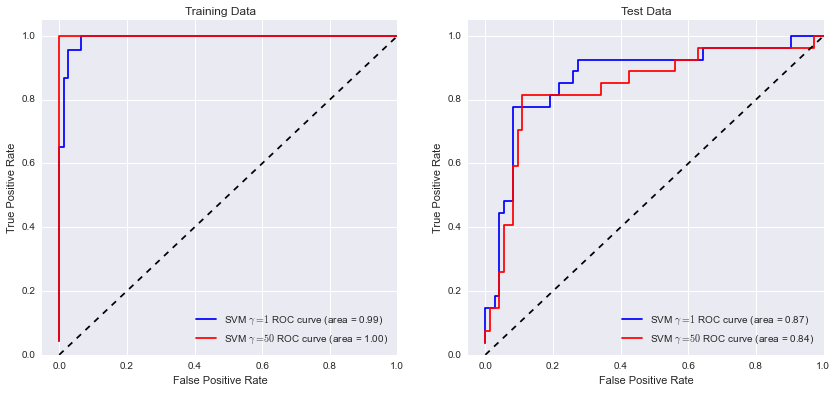

In [19]:
y_train_score3 = svm3.decision_function(X_train) # Distance of the samples X to the separating hyperplane.
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

In [20]:
print (y_train_score3)
false_pos_rate3, true_pos_rate3, threshold = roc_curve(y_train, y_train_score3)
roc_df = pd.DataFrame(np.vstack((false_pos_rate3, true_pos_rate3, threshold)).T, columns=['fpr', 'tpr', 'threshold'])
roc_df

[-0.999979   -1.00005372 -0.40446357  0.76664429 -0.99992701 -0.89438832
 -1.00147316 -0.99970016 -1.00858884  0.62963744 -0.99981105 -0.10930331
 -1.00022136  0.85717468 -1.00021564  0.50874452  0.999865   -0.99997596
  1.00013311 -0.99976124 -0.99992581 -1.11990236 -1.05525591 -0.99960168
 -1.21106686 -1.27668142  1.01206595 -1.00020629 -0.99960255 -1.00020039
 -1.11948919 -1.01588817 -1.00702794 -1.12833305 -1.00044184 -1.00036214
 -0.99992025 -1.00041939 -1.12070023 -1.05440647 -1.06530288  1.00009328
 -1.00048317 -1.01031326  1.12014779 -1.00016288 -0.99976011 -1.00015597
  0.63095777 -0.99986649 -1.00627459  1.13285097 -1.00015749  0.58206076
  1.00007787 -0.99961238 -0.99969664 -1.04341507  1.00291904 -1.00010596
 -0.99976064 -0.99976161 -0.85726043  0.78840286 -1.19905324 -0.36967325
 -0.649554   -0.999693   -1.03163143 -0.99991219  0.12516991 -1.09385805
 -1.01177796 -0.99983737 -0.99977106 -1.02954317 -0.99988771 -0.35789335
 -1.0303812  -1.00035567  0.36405468 -1.06796149 -0

,fpr,tpr,threshold
0,0.000000,0.043478,1.132851
1,0.000000,0.652174,0.766644
2,0.012987,0.652174,0.630958
3,0.012987,0.869565,0.125170
4,0.025974,0.869565,-0.109303
5,0.025974,0.956522,-0.369673
6,0.064935,0.956522,-0.857260
7,0.064935,1.000000,-0.894388
8,0.454545,1.000000,-1.000114
9,0.480519,1.000000,-1.000156


### 9.6.4 SVM with Multiple Classes

/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


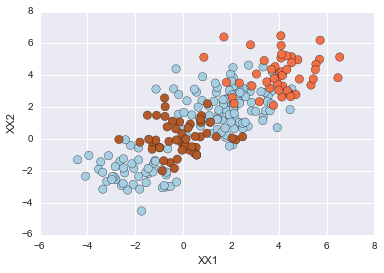

In [21]:
# Add a third class of observations 
np.random.seed(8)
XX = np.vstack((X, np.random.randn(50,2)))
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.Paired)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [22]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors: 133


/Users/neeravkharche/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


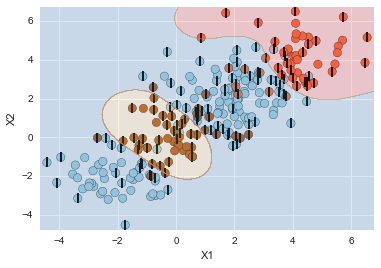

In [23]:
plot_svc(svm5, XX, yy)

### 9.6.5 Application to gene expression data

In [24]:
X_train = pd.read_csv('./data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('./data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
X_test = pd.read_csv('./data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('./data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()

In [25]:
# y_train counts
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [26]:
# y_test counts
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [27]:
svc = SVC(C=10, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm_df

True,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [32]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm_df

True,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


In [30]:
# Two cases classified incorrectly